# Load Preprocessed Data


In [19]:
import pandas as pd

train_path = "../../data/processed/loan-10k-preprocessed-train.csv"
test_path  = "../../data/processed/loan-10k-preprocessed-test.csv"
sol_path   = "../../data/processed/loan-10k-preprocessed-sol.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)
sol_df   = pd.read_csv(sol_path)  

## Prepare Features and Target


In [20]:
target_col = "grade"
id_col = "ID"

X_train = train_df.drop(columns=[target_col, id_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[id_col])

## KNN Classification

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Hold-Out split (80/20) from training set
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

results = []

k_values = [1, 3, 5, 7, 9, 11, 15, 21, 31]

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Fit
    model.fit(X_tr, y_tr)
    
    # Hold-out predictions
    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    
    # Cross-Val accuracy
    cv_acc = cross_val_score(model, X_train, y_train, cv=5).mean()

    results.append({
        "k": k,
        "holdout_acc": val_acc,
        "cv_acc": cv_acc
    })

res_df = pd.DataFrame(results)
print(res_df)

    k  holdout_acc  cv_acc
0   1       0.3985  0.3982
1   3       0.3890  0.3911
2   5       0.4095  0.4270
3   7       0.4140  0.4325
4   9       0.4190  0.4369
5  11       0.4255  0.4437
6  15       0.4310  0.4502
7  21       0.4465  0.4594
8  31       0.4600  0.4614


## KNN Accuracy

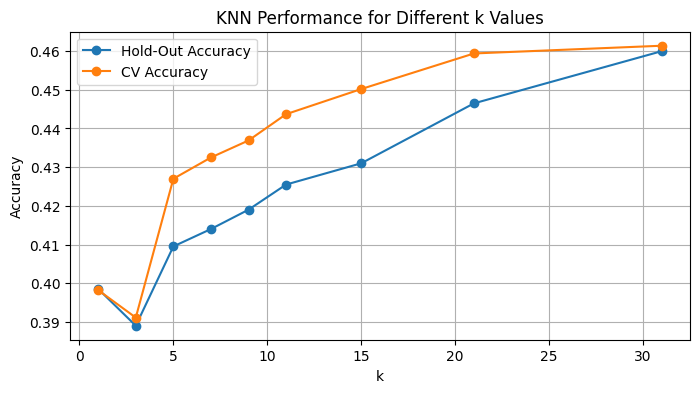

In [22]:
plt.figure(figsize=(8,4))
plt.plot(res_df["k"], res_df["holdout_acc"], marker="o", label="Hold-Out Accuracy")
plt.plot(res_df["k"], res_df["cv_acc"], marker="o", label="CV Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Performance for Different k Values")
plt.legend()
plt.grid(True)
plt.show()

## KNN Test Evaluation

Best k based on CV accuracy: 31
Best k based on Holdout accuracy: 31

TEST SET RESULTS

Best k (CV): 31
Test Accuracy (CV-based model): 0.3439

Best k (Holdout): 31
Test Accuracy (Holdout-based model): 0.3439

CLASSIFICATION REPORT - CV-based Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.51     10000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.34     10000
   macro avg       0.17      0.06      0.09     10000
weighted avg       1.00      0.34      0.51     10000


CLASSIFICATION REPORT - Holdout-based Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.51     10000


/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/

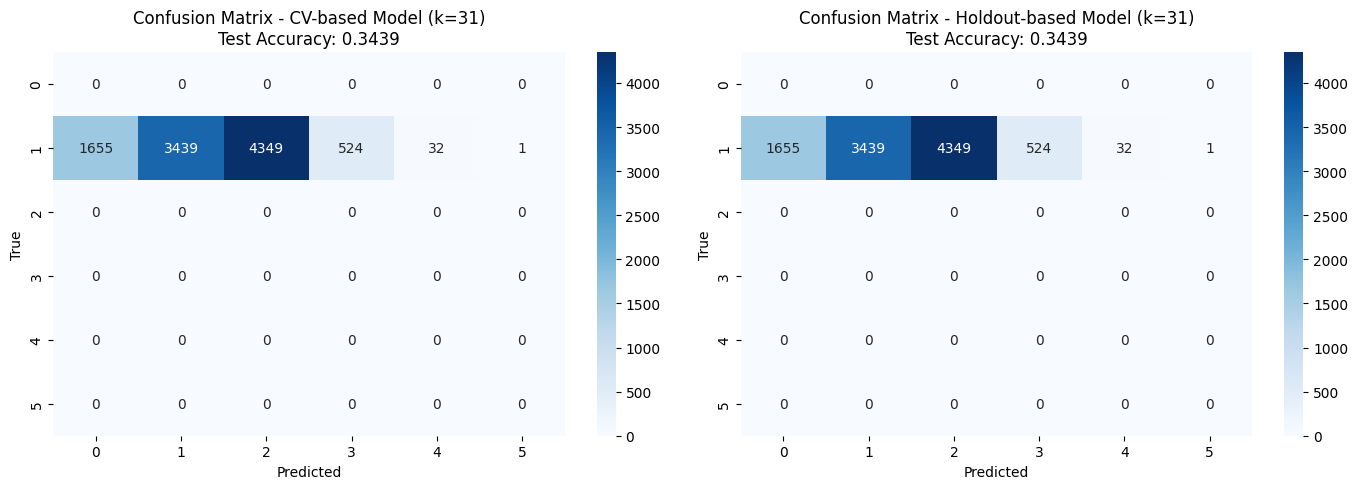

In [23]:
import seaborn as sns
import numpy as np

# Select best k based on CV accuracy
best_k_cv = int(res_df.sort_values("cv_acc", ascending=False).iloc[0]["k"])
print(f"Best k based on CV accuracy: {best_k_cv}")

# Select best k based on Holdout accuracy
best_k_holdout = int(res_df.sort_values("holdout_acc", ascending=False).iloc[0]["k"])
print(f"Best k based on Holdout accuracy: {best_k_holdout}\n")

# Train models with best k values on full training set
model_cv = KNeighborsClassifier(n_neighbors=best_k_cv)
model_cv.fit(X_train, y_train)

model_holdout = KNeighborsClassifier(n_neighbors=best_k_holdout)
model_holdout.fit(X_train, y_train)

# Make predictions on test set
y_test_pred_cv = model_cv.predict(X_test)
y_test_pred_holdout = model_holdout.predict(X_test)

# Get true labels from solution dataset
y_test_true = sol_df[target_col]

# Calculate accuracies
test_acc_cv = accuracy_score(y_test_true, y_test_pred_cv)
test_acc_holdout = accuracy_score(y_test_true, y_test_pred_holdout)

print("=" * 60)
print("TEST SET RESULTS")
print("=" * 60)
print(f"\nBest k (CV): {best_k_cv}")
print(f"Test Accuracy (CV-based model): {test_acc_cv:.4f}")
print(f"\nBest k (Holdout): {best_k_holdout}")
print(f"Test Accuracy (Holdout-based model): {test_acc_holdout:.4f}")

# Classification reports
print("\n" + "=" * 60)
print("CLASSIFICATION REPORT - CV-based Model")
print("=" * 60)
print(classification_report(y_test_true, y_test_pred_cv))

print("\n" + "=" * 60)
print("CLASSIFICATION REPORT - Holdout-based Model")
print("=" * 60)
print(classification_report(y_test_true, y_test_pred_holdout))

# Confusion matrices
cm_cv = confusion_matrix(y_test_true, y_test_pred_cv)
cm_holdout = confusion_matrix(y_test_true, y_test_pred_holdout)

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_cv, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title(f"Confusion Matrix - CV-based Model (k={best_k_cv})\nTest Accuracy: {test_acc_cv:.4f}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(cm_holdout, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title(f"Confusion Matrix - Holdout-based Model (k={best_k_holdout})\nTest Accuracy: {test_acc_holdout:.4f}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


## Decision Trees

In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

def _safe_depth(val):
    """Helper to safely convert potential None/NaN values for max_depth."""
    return None if (val is None or (isinstance(val, float) and np.isnan(val)) or pd.isna(val)) else int(val)


param_grid = []
for depth in [None, 5, 10]:
    for minsplit in [2, 20]:
        for minleaf in [1, 10]:
            for crit in ["gini", "entropy"]:
                param_grid.append({
                    "max_depth": depth, 
                    "min_samples_split": minsplit, 
                    "min_samples_leaf": minleaf, 
                    "criterion": crit
                })

print(f"Testing {len(param_grid)} parameter combinations...")


results_list = []

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for params in param_grid:
    # Define the model for this loop iteration
    model = DecisionTreeClassifier(
        max_depth=_safe_depth(params["max_depth"]),
        min_samples_split=int(params["min_samples_split"]),
        min_samples_leaf=int(params["min_samples_leaf"]),
        criterion=params["criterion"],
        class_weight="balanced",  # Important for imbalanced data
        random_state=42
    )

 
    model.fit(X_tr, y_tr)

    val_pred = model.predict(X_val)
    
   
    hold_acc = accuracy_score(y_val, val_pred)
    hold_f1 = f1_score(y_val, val_pred, average="macro")

    
    cv_acc_scores = cross_val_score(model, X, y, cv=cv_strategy, scoring="accuracy", n_jobs=-1)
    cv_f1_scores = cross_val_score(model, X, y, cv=cv_strategy, scoring="f1_macro", n_jobs=-1)
    
    cv_acc = cv_acc_scores.mean()
    cv_f1 = cv_f1_scores.mean()

    current_run = {
        **params, 
        "holdout_acc": hold_acc,
        "holdout_f1": hold_f1,
        "cv_acc": cv_acc,
        "cv_f1": cv_f1
    }
    results_list.append(current_run)


results_df = pd.DataFrame(results_list)

# Sort by the most important metrics
# 1st Priority: Best CV F1-score (most robust)
# 2nd Priority: Best CV Accuracy-score
# 3rd Priority: Best Hold-Out F1-score
sort_by = ["cv_f1", "cv_acc", "holdout_f1", "holdout_acc"]
final_results = results_df.sort_values(by=sort_by, ascending=False)

print("\n--- Hyperparameter Tuning Results (Top 10) ---")
display(final_results.head(10))


best_params_series = final_results.iloc[0]
print("\n--- Best Configuration Found ---")
print(best_params_series)


hyperparam_keys = ["max_depth", "min_samples_split", "min_samples_leaf", "criterion"]
final_model_params = best_params_series[hyperparam_keys].to_dict()

print("\n--- Hyperparameters for the Final Model ---")
print(final_model_params)

Testing 24 parameter combinations...

--- Hyperparameter Tuning Results (Top 10) ---


,max_depth,min_samples_split,min_samples_leaf,criterion,holdout_acc,holdout_f1,cv_acc,cv_f1
2,NaN,2,10,gini,0.9710,0.836082,0.9694,0.845633
6,NaN,20,10,gini,0.9710,0.836082,0.9694,0.845633
18,10.0,2,10,gini,0.9705,0.835292,0.9686,0.839920
22,10.0,20,10,gini,0.9705,0.835292,0.9686,0.839920
3,NaN,2,10,entropy,0.9730,0.858385,0.9714,0.838620
7,NaN,20,10,entropy,0.9730,0.858385,0.9714,0.838620
19,10.0,2,10,entropy,0.9715,0.856367,0.9712,0.838548
23,10.0,20,10,entropy,0.9715,0.856367,0.9712,0.838548
1,NaN,2,1,entropy,0.9760,0.820041,0.9758,0.832017
4,NaN,20,1,gini,0.9730,0.842317,0.9707,0.831957



--- Best Configuration Found ---
max_depth                 NaN
min_samples_split           2
min_samples_leaf           10
criterion                gini
holdout_acc             0.971
holdout_f1           0.836082
cv_acc                 0.9694
cv_f1                0.845633
Name: 2, dtype: object

--- Hyperparameters for the Final Model ---
{'max_depth': nan, 'min_samples_split': 2, 'min_samples_leaf': 10, 'criterion': 'gini'}


## Decision Tree Test Set Evaluation

Best Decision Tree hyperparameters:
  max_depth: nan
  min_samples_split: 2
  min_samples_leaf: 10
  criterion: gini

DECISION TREE TEST SET RESULTS

Best hyperparameters:
  max_depth: nan
  min_samples_split: 2
  min_samples_leaf: 10
  criterion: gini

Test Accuracy: 0.2962

CLASSIFICATION REPORT - Decision Tree
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46     10000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.30     10000
   macro avg       0.14      0.04      0.07     10000
weighted avg       1.00      0.30      0.46     10000



/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


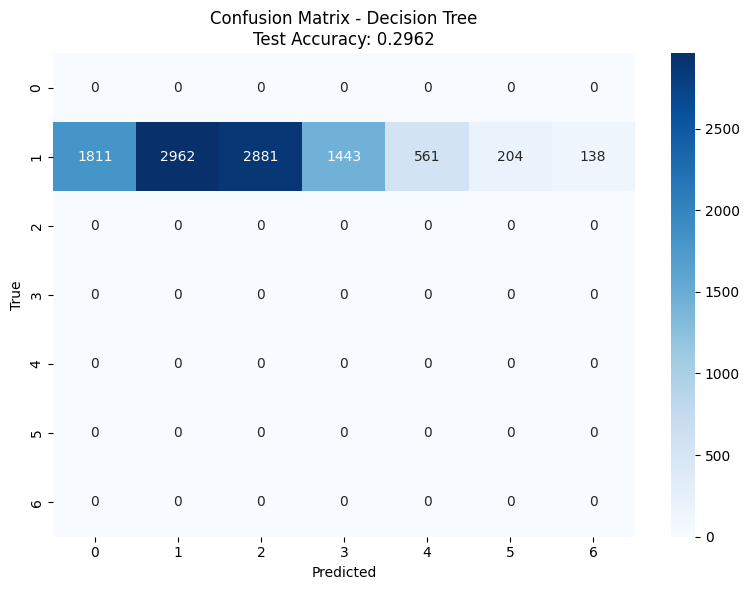

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Use the best hyperparameters found in the Decision Tree section
# The best model is stored in final_model_params
best_dt_params = final_model_params.copy()

print("Best Decision Tree hyperparameters:")
print(f"  max_depth: {best_dt_params['max_depth']}")
print(f"  min_samples_split: {int(best_dt_params['min_samples_split'])}")
print(f"  min_samples_leaf: {int(best_dt_params['min_samples_leaf'])}")
print(f"  criterion: {best_dt_params['criterion']}\n")

# Train final model with best hyperparameters on full training set
model_dt_best = DecisionTreeClassifier(
    max_depth=_safe_depth(best_dt_params['max_depth']),
    min_samples_split=int(best_dt_params['min_samples_split']),
    min_samples_leaf=int(best_dt_params['min_samples_leaf']),
    criterion=best_dt_params['criterion'],
    class_weight="balanced",  # Same as used in hyperparameter tuning
    random_state=42
)
model_dt_best.fit(X_train, y_train)

# Make predictions on test set
y_test_pred_dt = model_dt_best.predict(X_test)

# Get true labels from solution dataset
y_test_true = sol_df[target_col]

# Calculate accuracy
test_acc_dt = accuracy_score(y_test_true, y_test_pred_dt)

print("=" * 60)
print("DECISION TREE TEST SET RESULTS")
print("=" * 60)
print(f"\nBest hyperparameters:")
print(f"  max_depth: {best_dt_params['max_depth']}")
print(f"  min_samples_split: {int(best_dt_params['min_samples_split'])}")
print(f"  min_samples_leaf: {int(best_dt_params['min_samples_leaf'])}")
print(f"  criterion: {best_dt_params['criterion']}")
print(f"\nTest Accuracy: {test_acc_dt:.4f}")

# Classification report
print("\n" + "=" * 60)
print("CLASSIFICATION REPORT - Decision Tree")
print("=" * 60)
print(classification_report(y_test_true, y_test_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test_true, y_test_pred_dt)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Decision Tree\nTest Accuracy: {test_acc_dt:.4f}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


## Random Forest


In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score


param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2"]
}

grid_size = 1
for key in param_grid_rf:
    grid_size *= len(param_grid_rf[key])
    
print(f"Testing {grid_size} parameter combinations...")

#
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(
    class_weight="balanced",
    random_state=42
    # Note: n_jobs=-1 here parallelizes *within* a single model.
    # The n_jobs in GridSearchCV parallelizes *across different models*.
    # It's good to have both, but the GridSearchCV one is the one you're asking for.
)

# 3. Set up GridSearchCV
# This object replaces your entire FOR loop
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=cv_strategy,
    scoring='f1_macro',  
    n_jobs=-1,           
    refit=True,          
    verbose=2            
)

print("Running Grid Search...")
# 
# This one command does all the work:
# - Runs all 144 combinations
# - Runs 5-fold CV for each (144 * 5 = 720 model fits)
# - Runs them in parallel (n_jobs=-1)
# - Finds the best one
grid_search.fit(X_train, y_train) 


print("\n--- Best Configuration Found ---")
print(grid_search.best_params_)

print("\n--- Best CV F1-Macro Score ---")
print(grid_search.best_score_)

final_model_params_rf = grid_search.best_estimator_


Testing 144 parameter combinations...
Running Grid Search...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END criterion=gini, max_depth=None, max_features

## Random Forest Test Set Evaluation


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Use the best hyperparameters found in the Random Forest section
# The best model is stored in final_model_params_rf
best_rf_params = final_model_params_rf.copy()

print("Best Random Forest hyperparameters:")
print(f"  n_estimators: {int(best_rf_params['n_estimators'])}")
print(f"  max_depth: {best_rf_params['max_depth']}")
print(f"  min_samples_split: {int(best_rf_params['min_samples_split'])}")
print(f"  min_samples_leaf: {int(best_rf_params['min_samples_leaf'])}")
print(f"  criterion: {best_rf_params['criterion']}")
print(f"  max_features: {best_rf_params['max_features']}\n")

# Train final model with best hyperparameters on full training set
model_rf_best = RandomForestClassifier(
    n_estimators=int(best_rf_params['n_estimators']),
    max_depth=_safe_depth(best_rf_params['max_depth']),
    min_samples_split=int(best_rf_params['min_samples_split']),
    min_samples_leaf=int(best_rf_params['min_samples_leaf']),
    criterion=best_rf_params['criterion'],
    max_features=best_rf_params['max_features'],
    class_weight="balanced",  # Same as used in hyperparameter tuning
    random_state=42,
    n_jobs=-1
)
model_rf_best.fit(X_train, y_train)

# Make predictions on test set
y_test_pred_rf = model_rf_best.predict(X_test)

# Get true labels from solution dataset
y_test_true = sol_df[target_col]

# Calculate accuracy
test_acc_rf = accuracy_score(y_test_true, y_test_pred_rf)

print("=" * 60)
print("RANDOM FOREST TEST SET RESULTS")
print("=" * 60)
print(f"\nBest hyperparameters:")
print(f"  n_estimators: {int(best_rf_params['n_estimators'])}")
print(f"  max_depth: {best_rf_params['max_depth']}")
print(f"  min_samples_split: {int(best_rf_params['min_samples_split'])}")
print(f"  min_samples_leaf: {int(best_rf_params['min_samples_leaf'])}")
print(f"  criterion: {best_rf_params['criterion']}")
print(f"  max_features: {best_rf_params['max_features']}")
print(f"\nTest Accuracy: {test_acc_rf:.4f}")

# Classification report
print("\n" + "=" * 60)
print("CLASSIFICATION REPORT - Random Forest")
print("=" * 60)
print(classification_report(y_test_true, y_test_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test_true, y_test_pred_rf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Random Forest\nTest Accuracy: {test_acc_rf:.4f}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'copy'